# 1 - Importar libs e carregar os DataFrames

In [1]:
# custom lib
from bibliotecas.limpeza import *

import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# warnings option
import warnings
warnings.filterwarnings('ignore')

# 2 - Lendo Arquivos

In [10]:
df_obitos = pd.read_csv('dados/raw/casos_obitos_doencas_preexistentes.csv', encoding ='utf8', delimiter=";")

In [11]:
df_idh = pd.read_csv('dados/raw/data_idh.csv', encoding ='ansi', delimiter=";", skipfooter=3)

## 2.1 - Ver os dataframes

In [12]:
# mostrando o shape do dataframe, linhas e colunas
df_obitos.shape

(4412182, 20)

In [13]:
# mostrando as primeiras linhas do dataframe
df_obitos.head(3)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,São Paulo,3550308,45.0,MASCULINO,CONFIRMADO,2021-03-18T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,São Paulo,3550308,39.0,MASCULINO,CONFIRMADO,2021-07-07T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,São Paulo,3550308,59.0,MASCULINO,CONFIRMADO,2021-01-20T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [14]:
# mostrando as primeiras linhas do dataframe
df_idh.head()

,Territorialidades,IDHM Renda 2010
0,Adamantina,0.772
1,Adolfo,0.710
2,Aguaí,0.703
3,Águas da Prata,0.750
4,Águas de Lindóia,0.725


# 3 - Limpeza de dados 

In [15]:
df_obitos.describe().T

,count,mean,std,min,25%,50%,75%,max
codigo_ibge,4412182.0,3.534491e+06,17281.778729,3500105.0,3518800.0,3540804.0,3550308.0,3599999.0
idade,4391965.0,4.093999e+01,17.637483,0.0,28.0,40.0,53.0,136.0
obito,4412182.0,3.456702e-02,0.182680,0.0,0.0,0.0,0.0,1.0


In [16]:
df_idh.describe().T

,count,mean,std,min,25%,50%,75%,max
IDHM Renda 2010,644.0,0.716447,0.040289,0.592,0.691,0.7155,0.74,0.891


Analizando as tabelas acima não parece haver nenhuma incosistência significativa no DataFrame.

## 3.1 - Linhas duplicada, colunas duplicadas e colunas constantes

### 3.1.1 - Linhas duplicadas

Analisando a presença de linhas duplicadas no dataframe

In [17]:
linhas_duplicadas(df_obitos)

Existem 1404170 linhas duplicadas


In [18]:
linhas_duplicadas(df_idh)

Não há linhas duplicadas no conjunto de dados.


- Como não existe idenficação de pacientes, é esperado que o número de duplicados seja alto
- Não existem municípios duplicados

### 3.1.2 - Colunas Duplicadas

Analisando a presença de colunas dataframe

In [19]:
colunas_duplicadas(df_obitos)

Não há colunas duplicadas no conjunto de dados.


In [20]:
colunas_duplicadas(df_idh)

Não há colunas duplicadas no conjunto de dados.


### 3.1.3 - Colunas com constantes 

Analisando a existencia de colunas constantes que não agregam na nossa análise e devem ser removidas

In [21]:
colunas_constantes(df_obitos)

Colunas constantes: ['diagnostico_covid19']


In [22]:
colunas_constantes(df_idh)

Não há colunas constantes no conjunto de dados.


# 3.1.3 - Colunas com baixa variância

Analisando colunas que tem uma baixa variancia de valores se aproximando de valores constantes.

In [23]:
colunas_baixa_variancia = identify_cols_low_variance(df_obitos, low_variance_threshold=0.001)

if len(colunas_baixa_variancia) > 0:
    print('Colunas com baixa variância:', colunas_baixa_variancia)
    df_obitos.drop(colunas_baixa_variancia, axis=1, inplace=True)
    
else:
    print('Não há colunas com baixa variância no conjunto de dados.')

Não há colunas com baixa variância no conjunto de dados.


O dataframe de IDH não será analisado, os valores são significativos mesmo com baixa variância.

## 3.2 - Outliers

Analisaremos a presença de outliers no conjunto de dados, para que possamos entender como tratar e selecionar o intervalo que nos será útil.

### 3.2.1 - Feature Idade 

Sabemos que a presença de pessoas com mais de 110 anos é pouco provavel e que esses valores podem causados por erros de preenchimento de formulario.

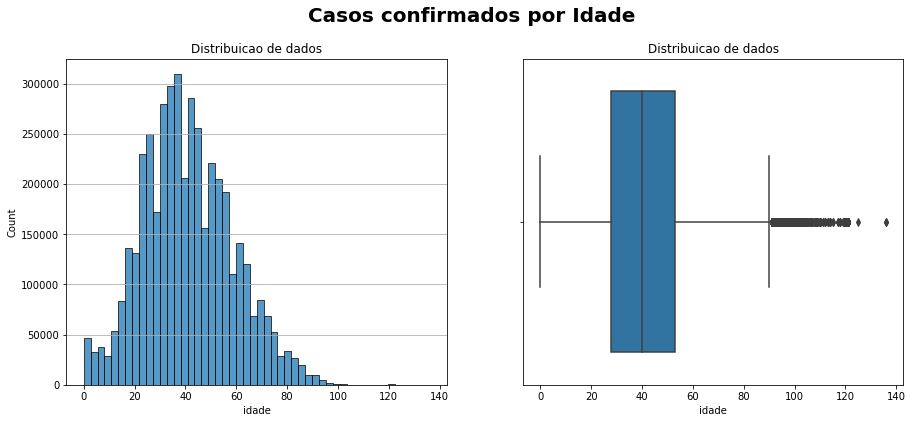

In [24]:
fig, ax = plt.subplots (1,2, figsize = (15,6))
ax[0].set_title(f'Distribuicao de dados')
ax[1].set_title(f'Distribuicao de dados')

fig.suptitle (f'Casos confirmados por Idade', fontsize = 20, fontweight = 'bold', y =1)
sns.histplot(data = df_obitos.idade,bins = 50, ax=ax[0])
ax[0].grid(axis = 'y')


ax = sns.boxplot(x=df_obitos["idade"], ax=ax[1])
# ax[1].set_title(f'Distribuicao de dados')
plt.show()

In [25]:
X_maior_100=pd.DataFrame(df_obitos.query('idade > 110'))

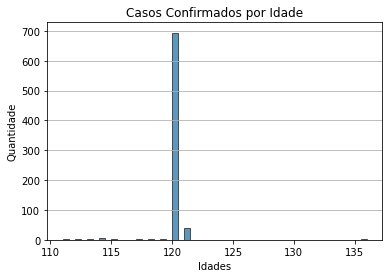

In [26]:
fig, ax = plt.subplots ()
sns.histplot(data = X_maior_100.idade,bins = 50)
ax.grid(axis = 'y')

# formatando a imagem
ax.set_title('Casos Confirmados por Idade')
ax.set_xlabel('Idades')
ax.set_ylabel('Quantidade')
plt.show()

In [27]:
print('Temos ao todo, ', X_maior_100.shape[0],'observações com idade registradas acima de 110 anos')

Temos ao todo,  764 observações com idade registradas acima de 110 anos


In [28]:
print(f'{100 * (X_maior_100.shape[0] / df_obitos.shape[0])} % de pessoas com iadde maior que 110 anos')

0.01731569549941503 % de pessoas com iadde maior que 110 anos


Decidiu-se por considerar essas observções que 
Tomada de decisão para analise do DataSet foi de retirar as observações e considerar os registros como erros.

In [29]:
# removendo entradas de pessoas com mais de 110 anos 
remove = df_obitos.loc[(df_obitos['idade'] > 110)]
df_obitos_clean = df_obitos.drop(remove.index)

### 3.2.2 - Feature cs_sexo

Explorando a feature cs_sexo para entender quais são os dados e como podemos trata-los

In [30]:
list(df_obitos_clean['cs_sexo'].unique())

['MASCULINO', 'FEMININO', 'INDEFINIDO', 'IGNORADO', nan]

In [31]:
df_sexo = df_obitos_clean.query('cs_sexo == "INDEFINIDO" or cs_sexo == "IGNORADO"')
print(f'Temos {df_sexo.shape[0]} linhas com cs_sexo INDEFINIDO ou IGNORADO')

Temos 3600 linhas com cs_sexo INDEFINIDO ou IGNORADO


In [32]:
print(f'Temos {100*(df_sexo.shape[0] / df_obitos.shape[0])} linhas com cs_sexo INDEFINIDO ou IGNORADO')

Temos 0.08159228245797658 linhas com cs_sexo INDEFINIDO ou IGNORADO


Por conta da pequena quantidade de cs_sexo COMO "INDEFINIDO" ou "IGNORADO" decidimos remover essas linhas

In [33]:
df_obitos_clean = df_obitos_clean.drop(df_obitos_clean[
    (df_obitos_clean.cs_sexo == "INDEFINIDO") | 
    (df_obitos_clean.cs_sexo == "IGNORADO") |
    (df_obitos_clean.cs_sexo.isnull() ) ].index)

In [34]:
perc = pd.Series(df_obitos_clean['cs_sexo']).value_counts()       
print(( perc / len(df_obitos_clean['cs_sexo']))*100) 

FEMININO     53.115318
MASCULINO    46.884682
Name: cs_sexo, dtype: float64


A variavél sexo está equilibrada em relacao a populacao global que apresenta uma maior quantidade de mulheres em relacao a homens


## 3.3 - Tratamento de Nulos

Observaremos a quantidade e em qual feature temos valores nulos e como podemos tratar esses dados.

In [35]:
checa_nulos(df_obitos_clean)

,nulos,%
nome_munic,0,0.00
codigo_ibge,0,0.00
idade,19690,0.45
cs_sexo,0,0.00
data_inicio_sintomas,41578,0.94
obito,0,0.00
asma,0,0.00
cardiopatia,0,0.00
diabetes,0,0.00
doenca_hematologica,0,0.00


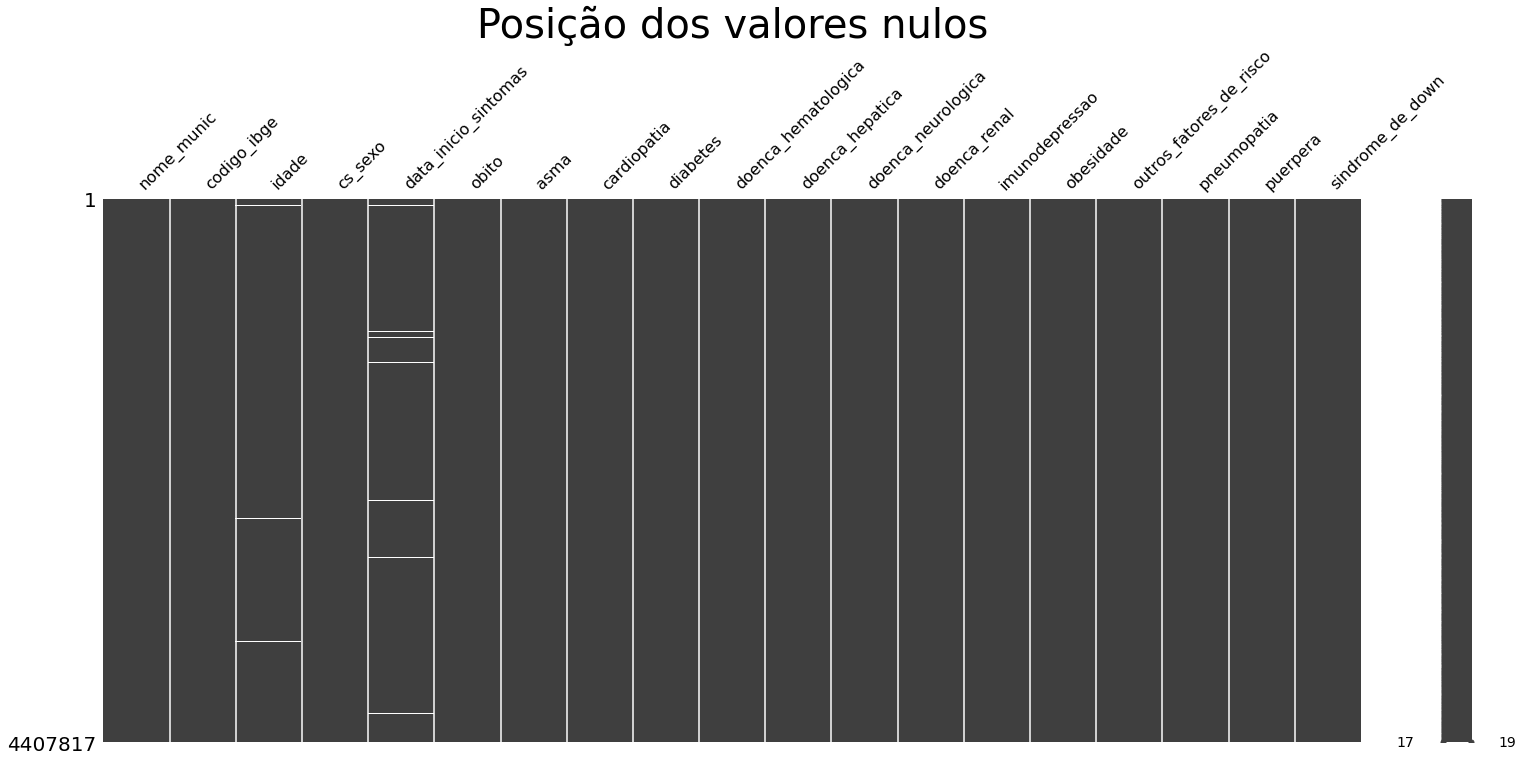

In [36]:
%config InlineBackend.figure_format = 'png'
msno.matrix(df_obitos_clean)
plt.title(label ='Posição dos valores nulos',fontsize=40)
plt.show()

In [37]:
checa_nulos(df_idh)

,nulos,%
Territorialidades,0,0.0
IDHM Renda 2010,0,0.0


Apenas as colunas "idade" e "data_inicio_sintomas" e 'sexo' da tabela df_obito possuem nulos e removeremos os dados pois queremos saber a idade das pessoas que contrairam covid dentro de um certo periodo para determinar o risco de suas comorbidades

In [38]:
df_obitos_clean = df_obitos_clean.dropna(subset = ['idade','data_inicio_sintomas','cs_sexo'])

In [39]:
checa_nulos(df_obitos_clean)

,nulos,%
nome_munic,0,0.0
codigo_ibge,0,0.0
idade,0,0.0
cs_sexo,0,0.0
data_inicio_sintomas,0,0.0
obito,0,0.0
asma,0,0.0
cardiopatia,0,0.0
diabetes,0,0.0
doenca_hematologica,0,0.0


## 3.4 - Analise da Feature Target - obito

In [40]:
list(df_obitos_clean['obito'].unique())

[0, 1]

In [41]:
freq = df_obitos_clean['obito'].value_counts()
perc = 100 *(pd.Series(df_obitos_clean['obito'], name='%').value_counts() / len(df_obitos_clean['obito']))   

In [42]:
obito = pd.merge(freq, perc, right_index = True,
               left_index = True).round(2)
obito

,obito,%
0,4208562,96.5
1,152502,3.5


O grande Desequilibrio da variavel target pode ser entendido que apesar da alta taxa de contaminacao (10 % de toda a poulacao do estado de São Paulo foi contaminada até a data observada)[1] o virus da SARS-COV19 apresenta uma baixa taxa de letalidade.

Do ponto de vista de modelagem esse desequilibrio pode ser prejudicial a modelagem

# 4 - Removendo acentuação

A feature de nome da cidade pode ter acentuação e isso atrapalha nas operações de JOIN, por isso escreveremos os nomes sem acento

In [43]:
df_idh['Territorialidades'] = df_idh['Territorialidades'].apply(corrigir_nomes)

In [44]:
df_obitos_clean['nome_munic'] = df_obitos_clean['nome_munic'].apply(corrigir_nomes)

# 5 - Renomeando colunas

In [45]:
df_idh.columns = ['nome_munic','idh']

# 6 -  Exportando o dataframe limpo

In [46]:
df_obitos_clean.to_pickle('dados/cleaned/df_nonan.pkl')
df_idh.to_pickle('dados/cleaned/df_idh.pkl')

# 5 - Referencias

[1] Panorama Populaciona do Etado de São Paulo. IBGE. Disponível em: <https://cidades.ibge.gov.br/brasil/sp/panorama>. Acesso em: 10 de Fev. de 2022